In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
Sales = pd.read_excel('Superstore.xls', index_col=0)

Sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Row ID,,,,,,,,,,,,,,,,,,,,,
1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,5.81,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


# Task 1: Superstore

Continue using the Superstore dataset. The output to be submitted is 
a) code using matplotlib 
b) screenshots showing your results using Qlik Sense.

- Map the amount of high-priority shipments within 2010 on a timeline.

C:\Users\Ke_Su\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


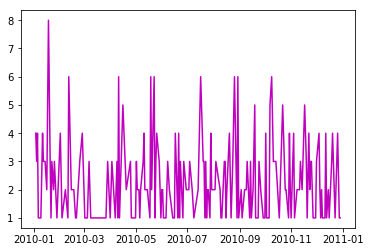

In [41]:
from datetime import datetime as dt

#this will render a warning but irrelevant in this case
Sales.sort_values(by=['Order Date'], inplace=True)


df = Sales[Sales['Order Priority'] == 'High']
df1 = df[df['Order Date'].dt.year == 2010]

x = np.array(df1["Order Date"].unique())
y = np.array(df1["Order Priority"].groupby(df1["Order Date"]).count())

plt.plot(x,y, 'm')

plt.show()

- Graph out the minimum and maximum shipping costs per container type.

,Maximum Shipping Cost,Minimum Shipping Cost
Product Container,,
Jumbo Drum,164.73,0.75
Jumbo Box,154.12,0.50
Large Box,69.00,3.97
Medium Box,58.66,0.99
Small Box,57.87,0.49
Small Pack,54.95,0.99
Wrap Bag,37.58,0.70


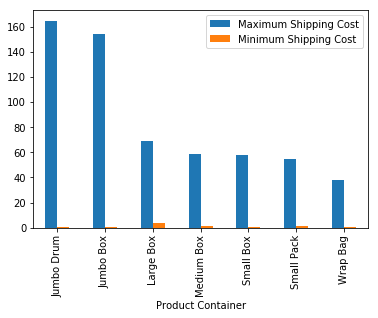

In [124]:
# Shipping Cost
# Product Container

container_cost_max = Sales.groupby(Sales["Product Container"]).max()
container_cost_min = Sales.groupby(Sales["Product Container"]).min()


categories_max = container_cost_max.groupby('Product Container')
categories_min = container_cost_min.groupby('Product Container')
values_max = categories_max['Shipping Cost'].max().sort_values(ascending=False)
values_min = categories_min['Shipping Cost'].min().sort_values(ascending=False)

df_max = values_max.to_frame()
df_min = values_min.to_frame()

df = pd.merge(df_max, df_min, on='Product Container', how='inner')
df.columns = ['Maximum Shipping Cost', 'Minimum Shipping Cost']
df.plot.bar()
df
#values.plot.bar()

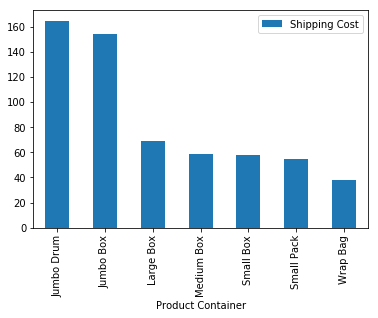

In [115]:
df_max.plot.bar()

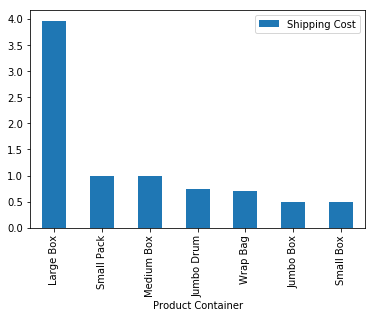

In [116]:
df_min.plot.bar()

- Compare profits per category amongst the different regions

In [136]:
categories_region = Sales.groupby(['Region','Product Category'])
region = categories_region['Profit'].sum().sort_values(ascending=False)
df_region_cate = region.to_frame()
df_region_cate

Profit
Region  Product Category               
Central Technology        286629.666400
South   Technology        267851.410100
East    Technology        185013.272500
Central Office Supplies   162819.102000
West    Technology        146819.166300
East    Office Supplies   138124.080500
South   Office Supplies   113316.691500
West    Office Supplies   103761.584000
        Furniture          48936.810000
South   Furniture          41339.010000
Central Furniture          32442.474940
East    Furniture          -5285.308659

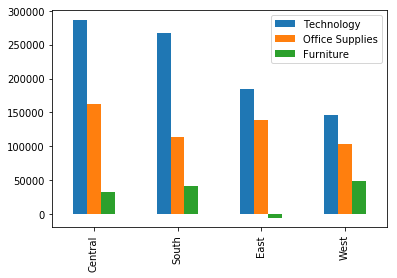

In [142]:
X = ['Central','South','East','West']
Y = [286629.666400,267851.410100,185013.272500,146819.166300]
Z = [162819.102000,113316.691500,138124.080500,103761.584000]
W = [32442.474940,41339.010000,-5285.308659,48936.810000]


df_r_c = pd.DataFrame(np.c_[Y,Z,W], index=X)
df_r_c.columns = ['Technology', 'Office Supplies', 'Furniture']
df_r_c

df_r_c.plot.bar()
plt.show()